# Week 7
This week: how to view information in abut your files, and how to view images in a jupyter notebook. DISCLAIMER: this is meant to be a 'quick and dirty' way to look at your data, and ignores a lot of important things (like knowing left from right). Use a proper program like fsleyes if you want those details to be correct. To do this We'll use nibabel, numpy, and matplotlib. First up: define a directory where your files live. I've been using various ways of defining paths, but today I'll stick to my new best friend, pathlib. I introduced it once already, but it's worth a revisit.

# Pathlib

In [1]:
import pathlib

In [2]:
class_path = pathlib.Path('/projects/lcni/jolinda/shared/TalapasClass')

In [3]:
bidspath = class_path / 'ds000114'

In [4]:
# This is a pathlib.Path object
bidspath

PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114')

In [5]:
# If we want a string (to pass to bash for example) we just convert it with str()
str(bidspath)

'/projects/lcni/jolinda/shared/TalapasClass/ds000114'

pathlib has built in globbing! Before, if I wanted to list all T1w files from session 'test' in our bids directory, I would have done something this:

In [9]:
bidspath.name

'ds000114'

In [6]:
import os
import glob
glob.glob(os.path.join(bidspath, 'sub*', 'ses-test', '*', '*T1w.nii.gz'))

['/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-03/ses-test/anat/sub-03_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-08/ses-test/anat/sub-08_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-07/ses-test/anat/sub-07_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-06/ses-test/anat/sub-06_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-05/ses-test/anat/sub-05_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-04/ses-test/anat/sub-04_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-09/ses-test/anat/sub-09_ses-test_T1w.nii.gz',
 '/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-10/ses

bidspath has a 'glob' function that works the same way, and 'rglob', or 'relative glob'. 'rglob' doesn't require us to spell out all the intermediate directories.

In [7]:
bidspath.rglob('*ses-test*T1w.nii.gz')

<generator object Path.rglob at 0x2aaab10d1db0>

NEW PYTHON CONCEPT TIME!
# Generators
What's generator? It's a thing that generates the thing you actually want, but not until you really need it. This can be a huge performance boost in the right situation. We could spend a long time talking about them, and they are important concepts, but for today, just remember a few things: next() called on a generator will return the 'next' item generated. list() called on a generator will convert it to a list (if possible). sorted() called on a generator will return a sorted list if possible (fyi you can call sorted() on lists too). Finally, generators only generate their contents ONCE. 

In [20]:
generator = bidspath.rglob('*ses-test*T1w.nii.gz')

In [21]:
next(generator)

PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-03/ses-test/anat/sub-03_ses-test_T1w.nii.gz')

In [22]:
next(generator)

PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-08/ses-test/anat/sub-08_ses-test_T1w.nii.gz')

In [23]:
list(generator)

[PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-07/ses-test/anat/sub-07_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-06/ses-test/anat/sub-06_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-05/ses-test/anat/sub-05_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-04/ses-test/anat/sub-04_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-09/ses-test/anat/sub-09_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-10/ses-test/anat/sub-10_ses-test_T1w.nii.gz')]

In [24]:
list(generator)

[]

What happened? We ran out of items to generate. We need to recreate the generator to make it work again.

In [25]:
sorted(bidspath.rglob('*ses-test*T1w.nii.gz'))

[PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-03/ses-test/anat/sub-03_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-04/ses-test/anat/sub-04_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-05/ses-test/anat/sub-05_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-06/ses-test/anat/sub-06_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-07/ses-test/anat/sub-07_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-08/ses-test/anat/sub-08_ses-test_T1w.nii.gz'),
 PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-09/ses-test/

Okay, now that we are good with pathlib, let's open some files.

# Nibabel
We are going to use nibabel to look at some nifti files. I don't really care which one we use for our example, so I'll use next() to just get the first one in the glob.

In [26]:
example_anat = next(bidspath.rglob('*T1w.nii.gz'))

In [27]:
example_anat

PosixPath('/projects/lcni/jolinda/shared/TalapasClass/ds000114/sub-03/ses-test/anat/sub-03_ses-test_T1w.nii.gz')

In [28]:
import nibabel as nib

In [29]:
#  nibabel won't take a pathlib object, we have to convert to a string
anat_img = nib.load(str(example_anat))

In [30]:
print(anat_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 156 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        1.        1.2995942 1.        0.009672  0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.05023121
quatern_c       : 0.025447186
quatern_d       : 0.0032520767
qoffset_x       : -134.40193
qoffset_y

As you can see, the nifti header is pretty short, which is why they had to invent BIDS and add the json sidecar files (which are not included for the anat files in this data set). The items we need most often have shortcut methods for reading.

In [31]:
# size of the image in pixels
anat_img.header.get_data_shape()

(256, 156, 256)

That's our "x, y, z" in the image: columns, rows, slices. In this data the slices are axial (x = LR, y = PA, z = FH or IS), but they don't have to be.

In [32]:
# we can also just call the shape property of the image
anat_img.shape

(256, 156, 256)

In [33]:
# size of the voxels
anat_img.header.get_zooms()

(1.0, 1.2995942, 1.0)

In [34]:
# let's compare this to a bold image
example_bold = next(bidspath.rglob('*bold.nii.gz'))

In [35]:
bold_img = nib.load(str(example_bold))

In [36]:
bold_img.shape

(64, 64, 30, 173)

In [37]:
bold_img.header.get_zooms()

(4.0, 4.0, 4.0000057, 2.5)

The BOLD images are 4D, where the 4th dimension is time, with a TR = 2.5 s.

In [57]:
anat_img.get_fdata()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [58]:
# what type is that?
type(anat_img.get_fdata())

numpy.ndarray

Oh great, another new thing. What's a numpy.ndarray?
# Numpy
Python's built-in containers are not optimized for numeric calculation. By far the most popular package for this is numpy, traditionally imported as np:

In [40]:
import numpy as np

In [59]:
data = anat_img.get_data()
data.shape

(256, 156, 256)

In [60]:
data.mean()

124.143555

In [62]:
data.max()

3393.0

The whole point of this today is to work our way up to displaying our data in a notebook, so we are going to need to 'slice' our data. Numpy handles this intuitively, we just tell it the range of indices we want to extract.

In [73]:
ex_slice = data[0:256,0:156,150]

In [74]:
ex_slice.shape

(256, 156)

We don't have to explicitly say 0:max, since those are the default values. You can just use a colon. The above slice is equivalent to:

In [75]:
data[:,:,150]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Okay, but how do we LOOK at our data? We need one more module: matplotlib. 

In [76]:
import matplotlib.pyplot as plt

As you may have guessed from the name, "matplotlib" plots things in a matlab-like way. It has a function called 'imshow' that we can use to plot our image data

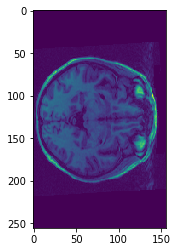

In [88]:
plt.imshow(ex_slice)
plt.show()

There are a few problems with this. One, it's rotated 90 degrees. Two, it's not black and white. Three, it's all squashy because our voxels aren't square. We can rotate by 90 degrees with a numpy function, and set a different aspect ration & colormap as parameters to imshow. Finally we can turn our axis labels off.

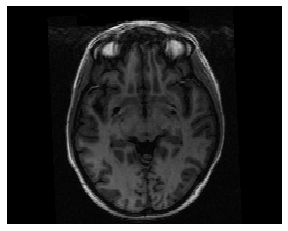

In [98]:
plt.imshow(np.rot90(ex_slice), aspect = 1.3, cmap = 'gray')
plt.axis('off')
plt.show()

What else can we do with numpy and matplotlib? Here's an example of how to get a time-series average of our bold images. We need to specify the axis along which to average. We could use either use 3 (axes are 0, 1, 2, 3) or -1 (first from the back).

In [67]:
bold_data = bold_img.get_fdata()
tmean = bold_data.mean(axis = -1)

In [68]:
tmean.shape

(64, 64, 30)

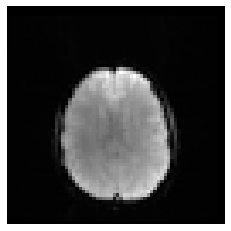

In [99]:
plt.imshow(np.rot90(tmean[:,:,15]), cmap = 'gray')
plt.axis('off')
plt.show()

What if, instead of averaging the volumes over time, we wanted to average over each volume and look at that as a function of time?

In [100]:
smean = bold_data.mean(axis = (0,1,2))
smean.shape

(173,)

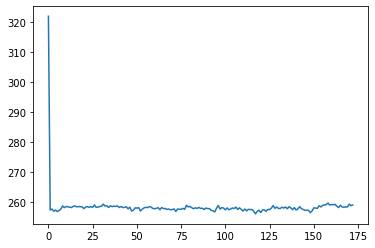

In [101]:
plt.plot(smean)
plt.show()

This tells us something! The system had not reached steady state when the first volume was collected. Whoever analyzes this data should probably toss that out. We can exclude that point if we want to.

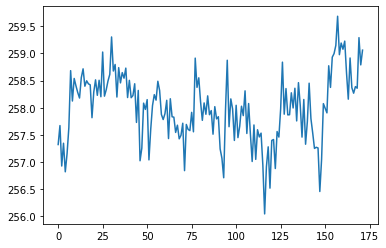

In [104]:
plt.plot(smean[1:])
plt.show()

We can put this all together to plot the mean image intensity over time for all the bold series in our data, just to look for anything interesting.

sub-01_ses-retest_task-covertverbgeneration_bold.nii.gz


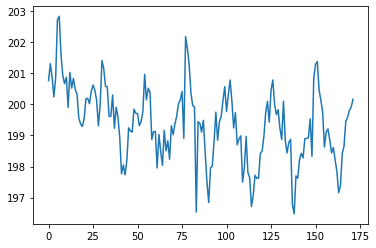

sub-01_ses-retest_task-fingerfootlips_bold.nii.gz


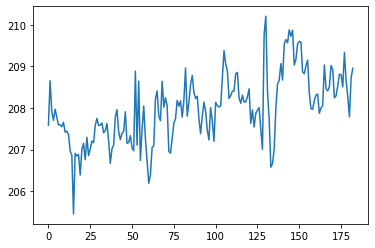

sub-01_ses-retest_task-linebisection_bold.nii.gz


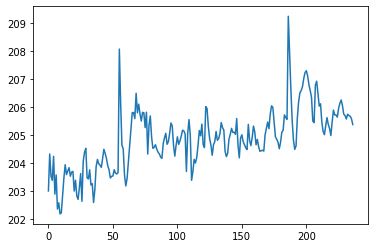

sub-01_ses-retest_task-overtverbgeneration_bold.nii.gz


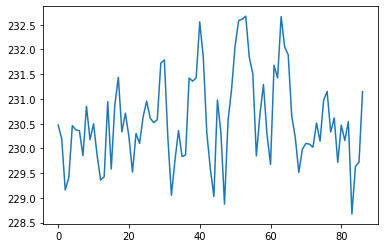

sub-01_ses-retest_task-overtwordrepetition_bold.nii.gz


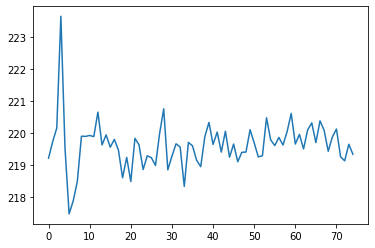

sub-01_ses-test_task-covertverbgeneration_bold.nii.gz


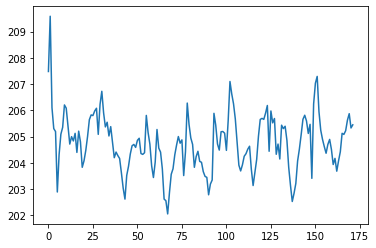

sub-01_ses-test_task-fingerfootlips_bold.nii.gz


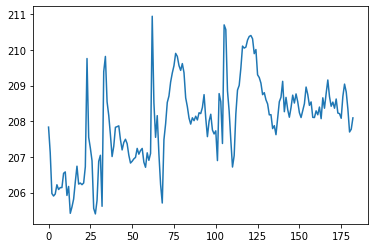

sub-01_ses-test_task-linebisection_bold.nii.gz


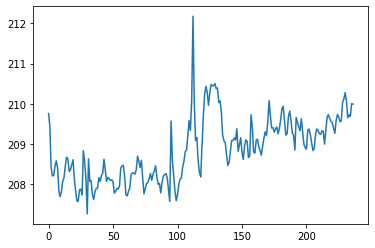

sub-01_ses-test_task-overtverbgeneration_bold.nii.gz


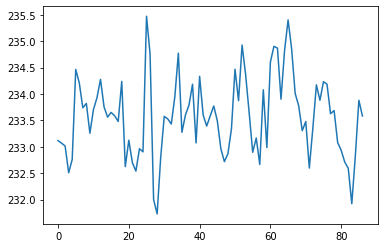

sub-01_ses-test_task-overtwordrepetition_bold.nii.gz


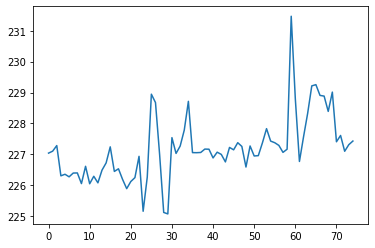

sub-02_ses-retest_task-covertverbgeneration_bold.nii.gz


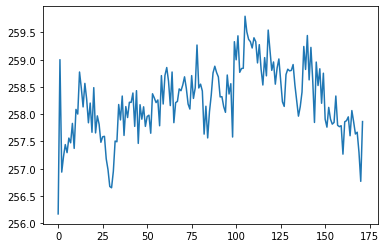

sub-02_ses-retest_task-fingerfootlips_bold.nii.gz


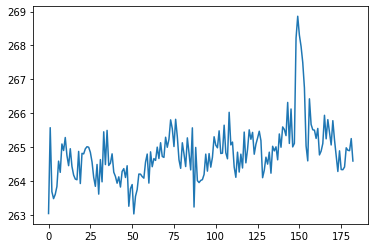

sub-02_ses-retest_task-linebisection_bold.nii.gz


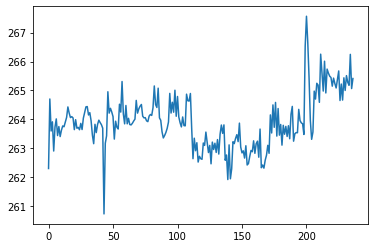

sub-02_ses-retest_task-overtverbgeneration_bold.nii.gz


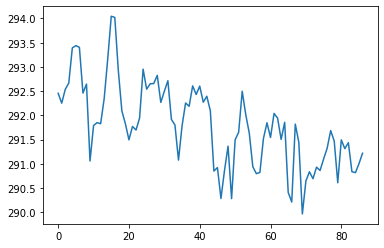

sub-02_ses-retest_task-overtwordrepetition_bold.nii.gz


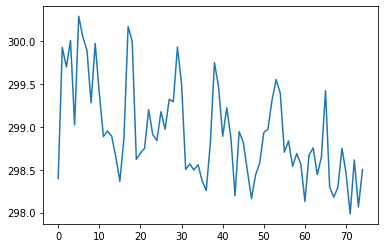

sub-02_ses-test_task-covertverbgeneration_bold.nii.gz


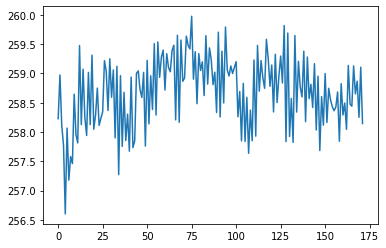

sub-02_ses-test_task-fingerfootlips_bold.nii.gz


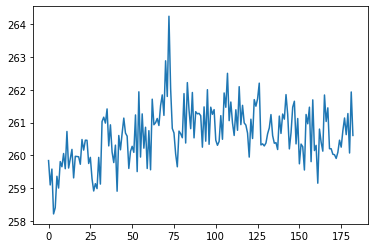

sub-02_ses-test_task-linebisection_bold.nii.gz


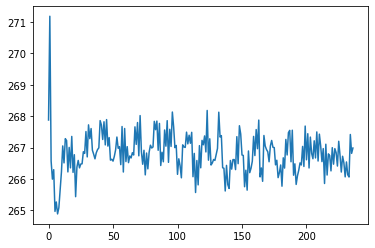

sub-02_ses-test_task-overtverbgeneration_bold.nii.gz


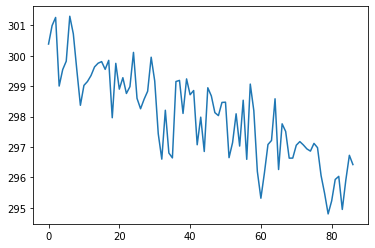

sub-02_ses-test_task-overtwordrepetition_bold.nii.gz


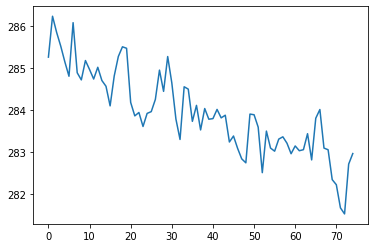

sub-03_ses-retest_task-covertverbgeneration_bold.nii.gz


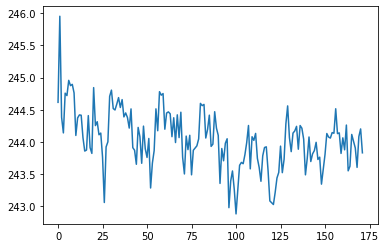

sub-03_ses-retest_task-fingerfootlips_bold.nii.gz


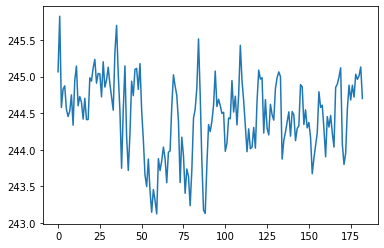

sub-03_ses-retest_task-linebisection_bold.nii.gz


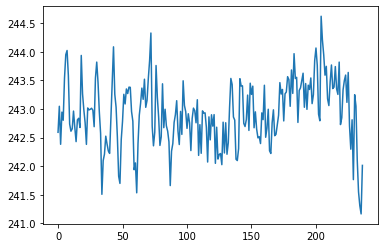

sub-03_ses-retest_task-overtverbgeneration_bold.nii.gz


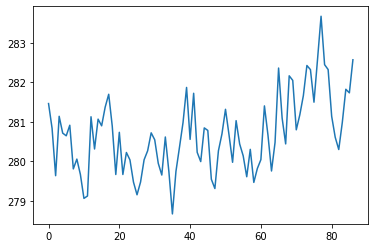

sub-03_ses-retest_task-overtwordrepetition_bold.nii.gz


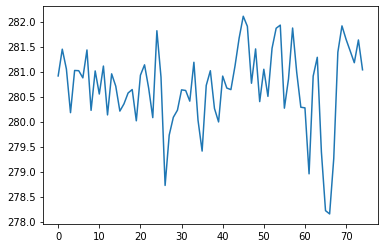

sub-03_ses-test_task-covertverbgeneration_bold.nii.gz


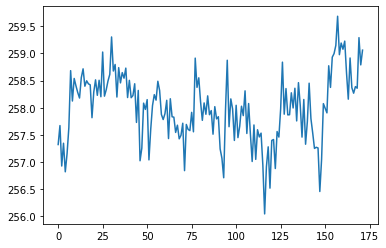

sub-03_ses-test_task-fingerfootlips_bold.nii.gz


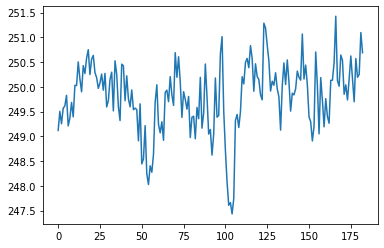

sub-03_ses-test_task-linebisection_bold.nii.gz


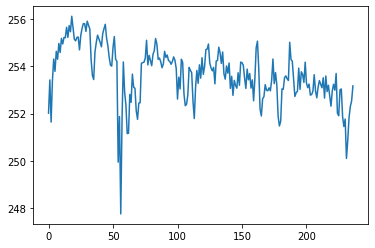

sub-03_ses-test_task-overtverbgeneration_bold.nii.gz


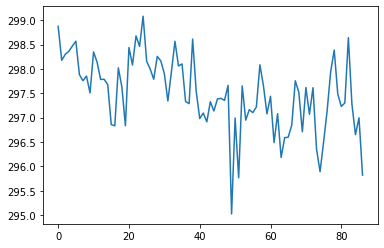

sub-03_ses-test_task-overtwordrepetition_bold.nii.gz


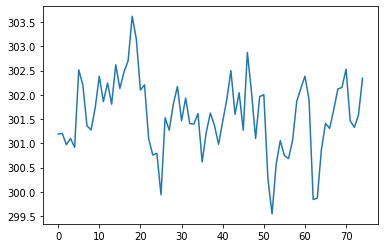

sub-04_ses-retest_task-covertverbgeneration_bold.nii.gz


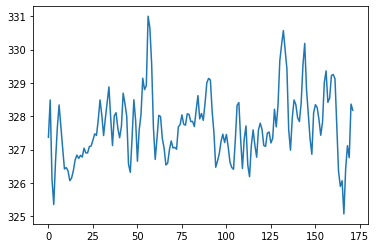

sub-04_ses-retest_task-fingerfootlips_bold.nii.gz


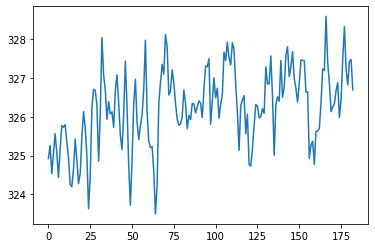

sub-04_ses-retest_task-linebisection_bold.nii.gz


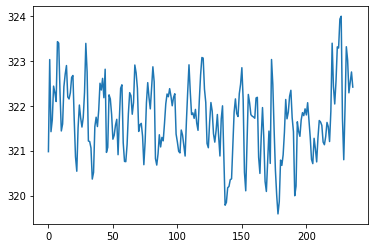

sub-04_ses-retest_task-overtverbgeneration_bold.nii.gz


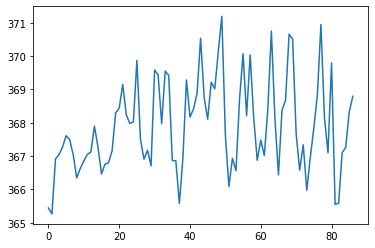

sub-04_ses-retest_task-overtwordrepetition_bold.nii.gz


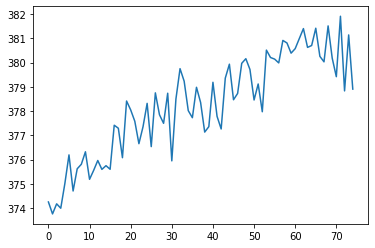

sub-04_ses-test_task-covertverbgeneration_bold.nii.gz


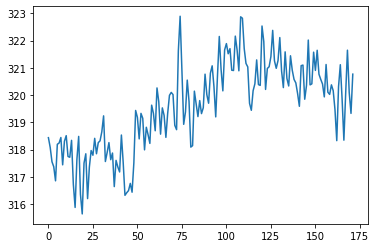

sub-04_ses-test_task-fingerfootlips_bold.nii.gz


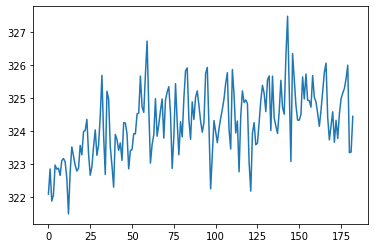

sub-04_ses-test_task-linebisection_bold.nii.gz


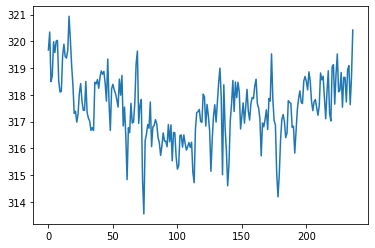

sub-04_ses-test_task-overtverbgeneration_bold.nii.gz


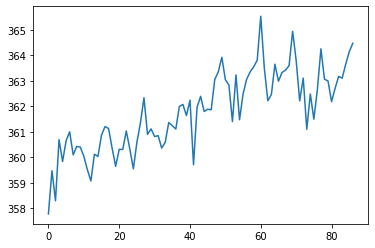

sub-04_ses-test_task-overtwordrepetition_bold.nii.gz


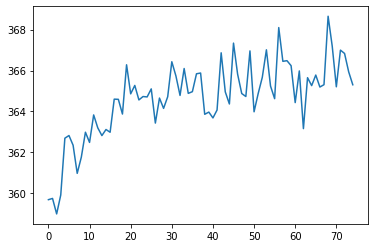

sub-05_ses-retest_task-covertverbgeneration_bold.nii.gz


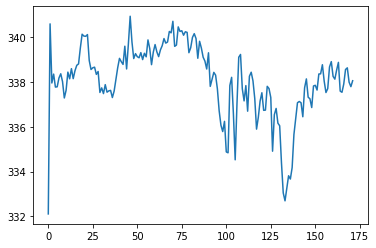

sub-05_ses-retest_task-fingerfootlips_bold.nii.gz


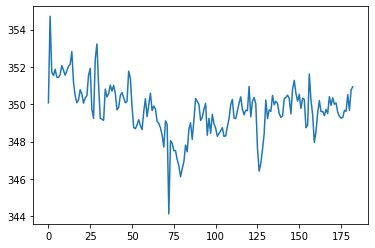

sub-05_ses-retest_task-linebisection_bold.nii.gz


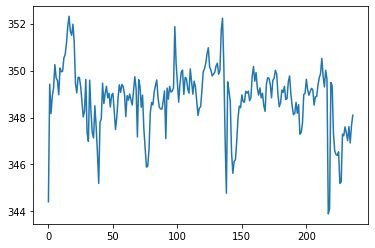

sub-05_ses-retest_task-overtverbgeneration_bold.nii.gz


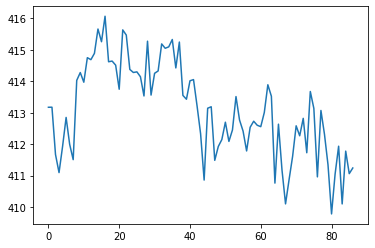

sub-05_ses-retest_task-overtwordrepetition_bold.nii.gz


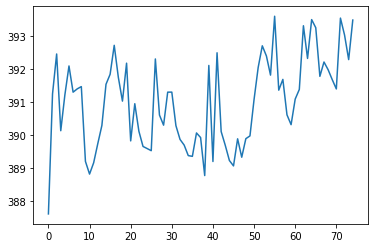

sub-05_ses-test_task-covertverbgeneration_bold.nii.gz


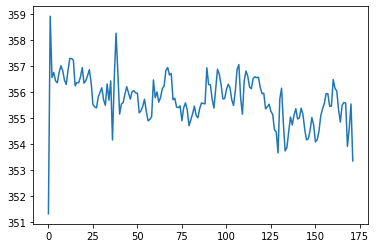

sub-05_ses-test_task-fingerfootlips_bold.nii.gz


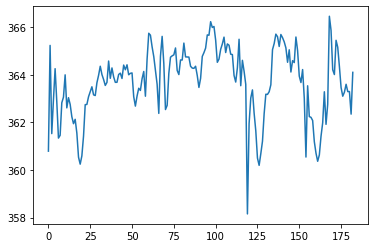

sub-05_ses-test_task-linebisection_bold.nii.gz


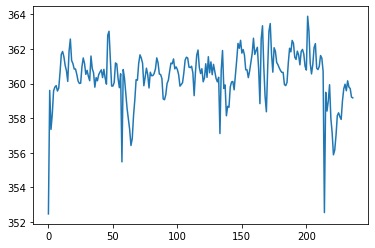

sub-05_ses-test_task-overtverbgeneration_bold.nii.gz


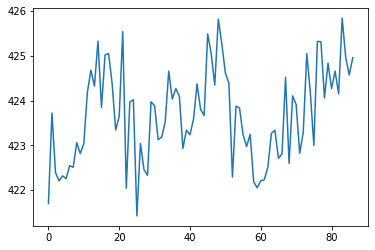

sub-05_ses-test_task-overtwordrepetition_bold.nii.gz


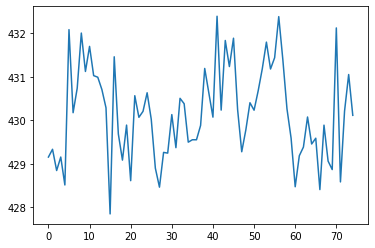

sub-06_ses-retest_task-covertverbgeneration_bold.nii.gz


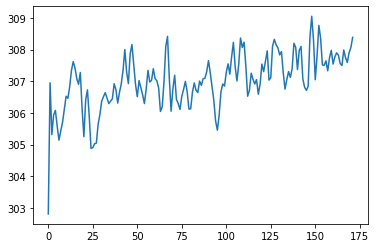

sub-06_ses-retest_task-fingerfootlips_bold.nii.gz


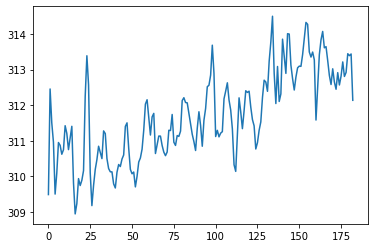

sub-06_ses-retest_task-linebisection_bold.nii.gz


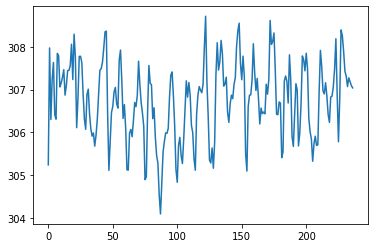

sub-06_ses-retest_task-overtverbgeneration_bold.nii.gz


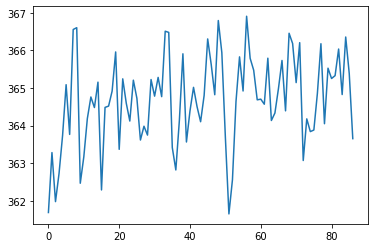

sub-06_ses-retest_task-overtwordrepetition_bold.nii.gz


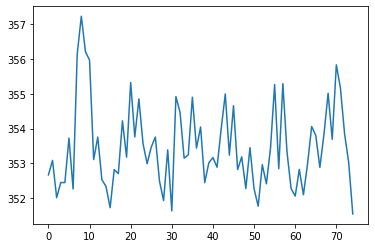

sub-06_ses-test_task-covertverbgeneration_bold.nii.gz


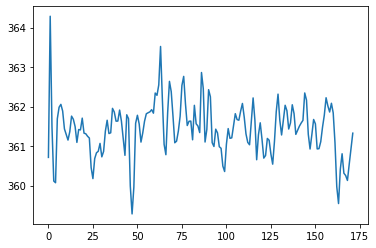

sub-06_ses-test_task-fingerfootlips_bold.nii.gz


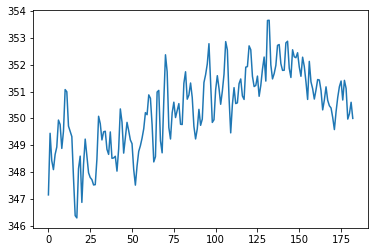

sub-06_ses-test_task-linebisection_bold.nii.gz


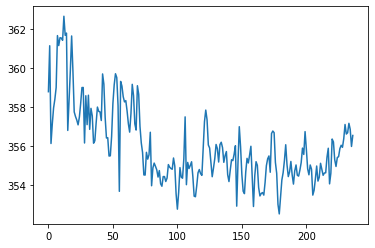

sub-06_ses-test_task-overtverbgeneration_bold.nii.gz


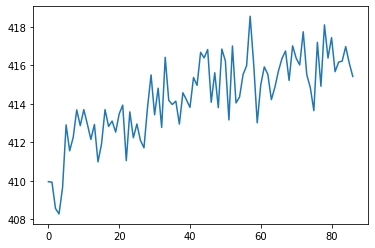

sub-06_ses-test_task-overtwordrepetition_bold.nii.gz


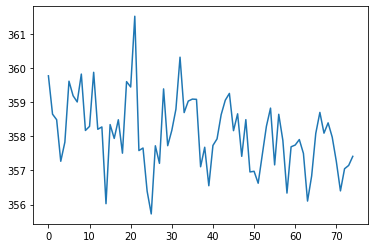

sub-07_ses-retest_task-covertverbgeneration_bold.nii.gz


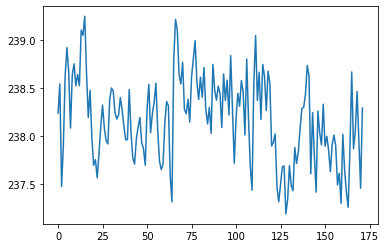

sub-07_ses-retest_task-fingerfootlips_bold.nii.gz


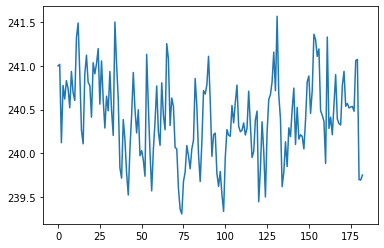

sub-07_ses-retest_task-linebisection_bold.nii.gz


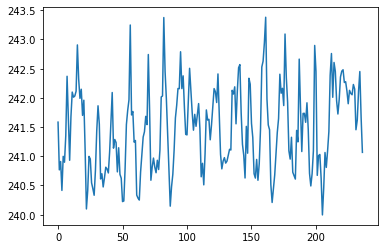

sub-07_ses-retest_task-overtverbgeneration_bold.nii.gz


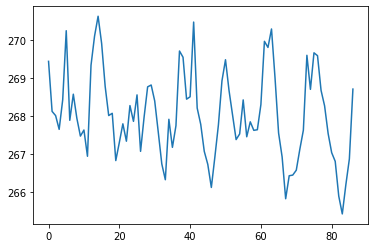

sub-07_ses-retest_task-overtwordrepetition_bold.nii.gz


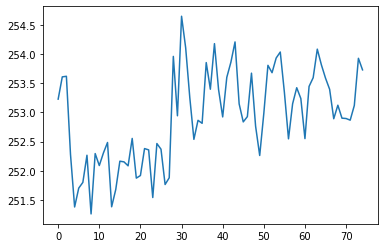

sub-07_ses-test_task-covertverbgeneration_bold.nii.gz


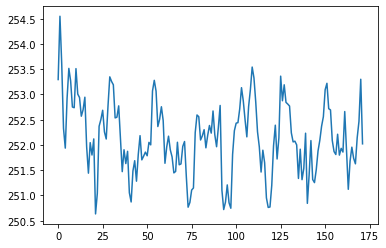

sub-07_ses-test_task-fingerfootlips_bold.nii.gz


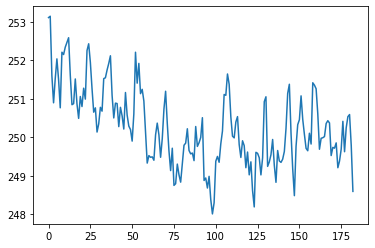

sub-07_ses-test_task-linebisection_bold.nii.gz


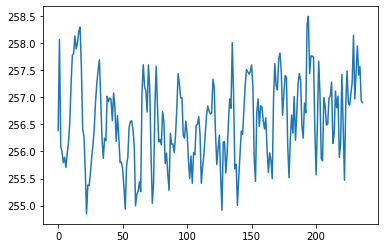

sub-07_ses-test_task-overtverbgeneration_bold.nii.gz


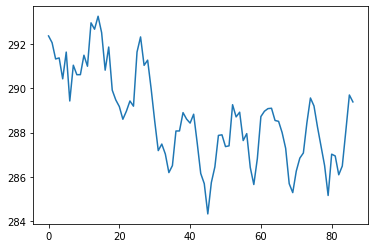

sub-07_ses-test_task-overtwordrepetition_bold.nii.gz


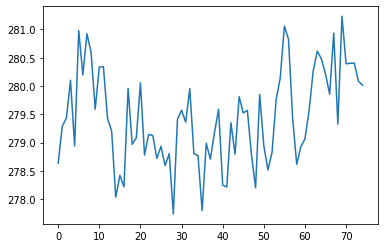

sub-08_ses-retest_task-covertverbgeneration_bold.nii.gz


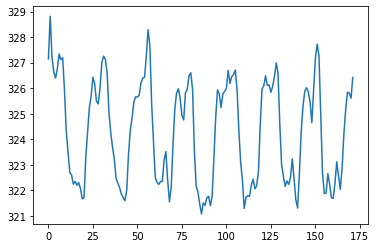

sub-08_ses-retest_task-fingerfootlips_bold.nii.gz


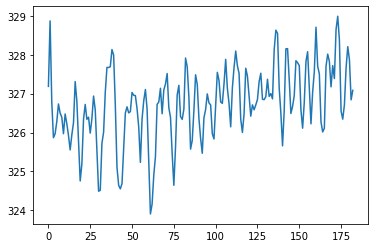

sub-08_ses-retest_task-linebisection_bold.nii.gz


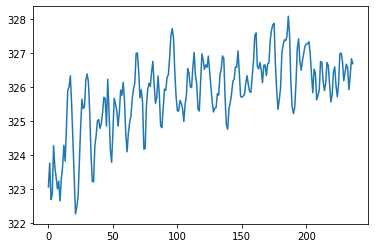

sub-08_ses-retest_task-overtverbgeneration_bold.nii.gz


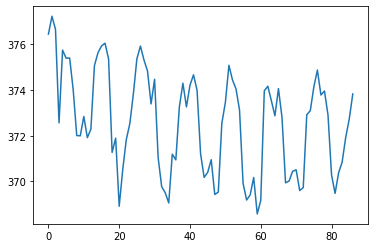

sub-08_ses-retest_task-overtwordrepetition_bold.nii.gz


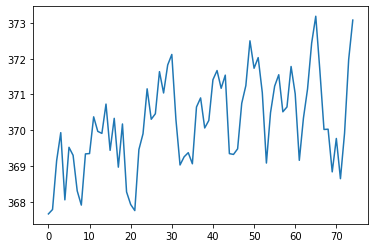

sub-08_ses-test_task-covertverbgeneration_bold.nii.gz


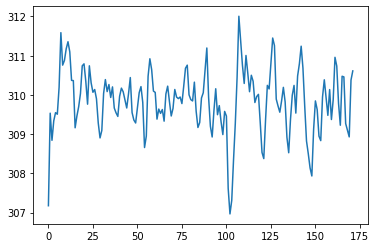

sub-08_ses-test_task-fingerfootlips_bold.nii.gz


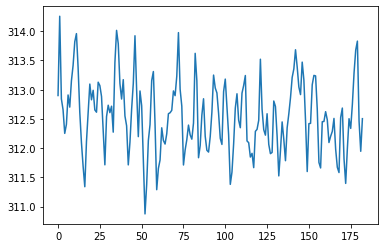

sub-08_ses-test_task-linebisection_bold.nii.gz


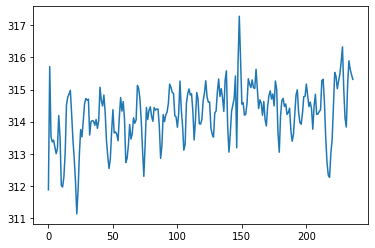

sub-08_ses-test_task-overtverbgeneration_bold.nii.gz


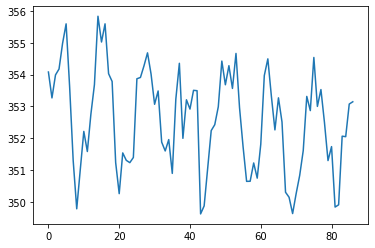

sub-08_ses-test_task-overtwordrepetition_bold.nii.gz


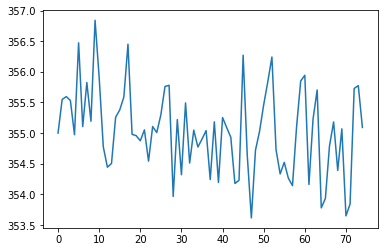

sub-09_ses-retest_task-covertverbgeneration_bold.nii.gz


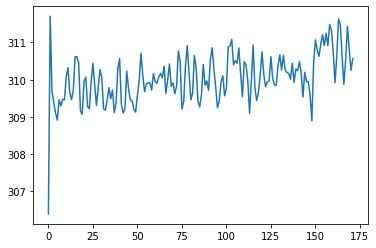

sub-09_ses-retest_task-fingerfootlips_bold.nii.gz


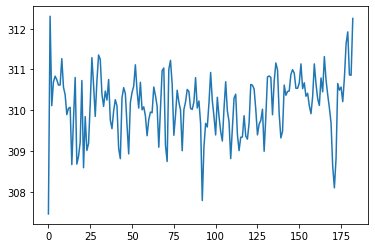

sub-09_ses-retest_task-linebisection_bold.nii.gz


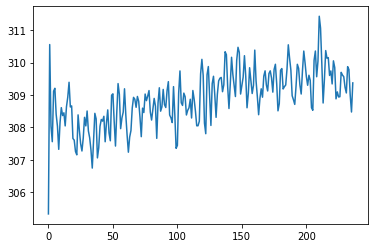

sub-09_ses-retest_task-overtverbgeneration_bold.nii.gz


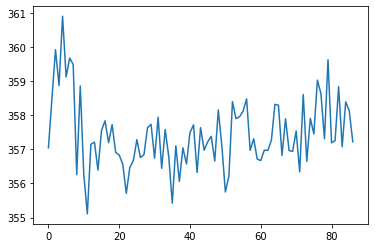

sub-09_ses-retest_task-overtwordrepetition_bold.nii.gz


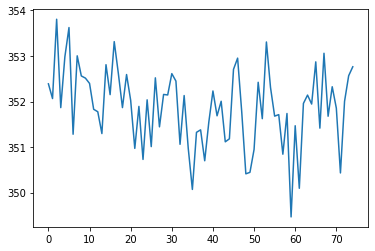

sub-09_ses-test_task-covertverbgeneration_bold.nii.gz


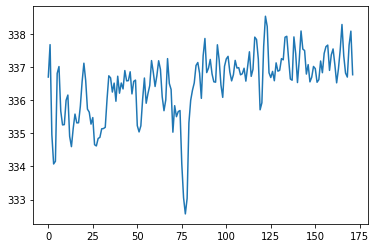

sub-09_ses-test_task-fingerfootlips_bold.nii.gz


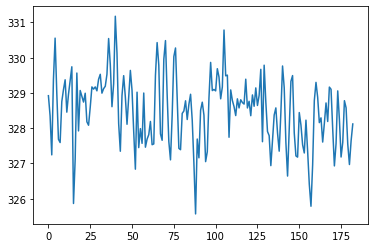

sub-09_ses-test_task-linebisection_bold.nii.gz


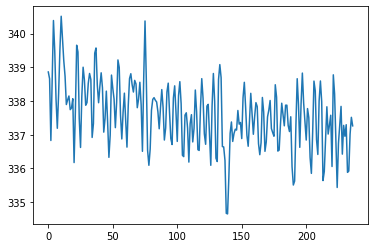

sub-09_ses-test_task-overtverbgeneration_bold.nii.gz


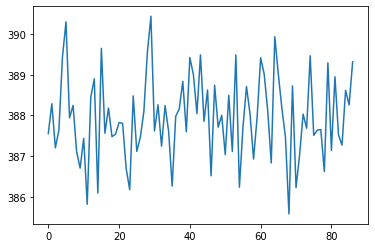

sub-09_ses-test_task-overtwordrepetition_bold.nii.gz


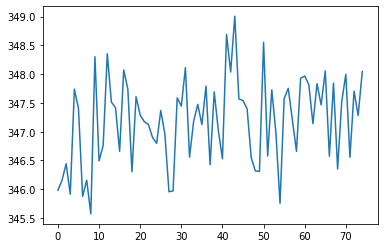

sub-10_ses-retest_task-covertverbgeneration_bold.nii.gz


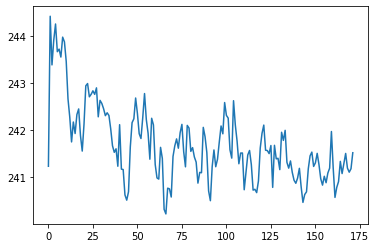

sub-10_ses-retest_task-fingerfootlips_bold.nii.gz


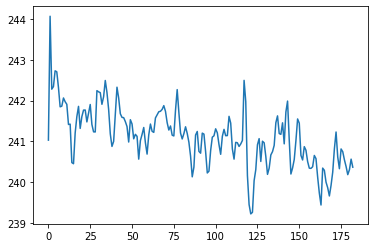

sub-10_ses-retest_task-linebisection_bold.nii.gz


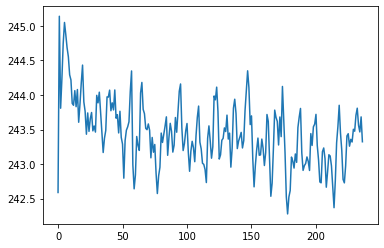

sub-10_ses-retest_task-overtverbgeneration_bold.nii.gz


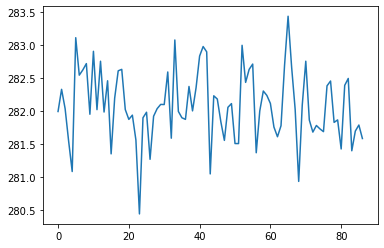

sub-10_ses-retest_task-overtwordrepetition_bold.nii.gz


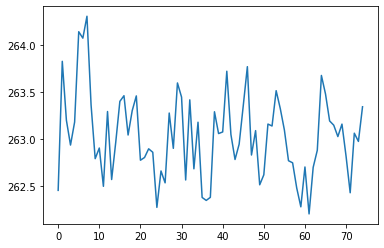

sub-10_ses-test_task-covertverbgeneration_bold.nii.gz


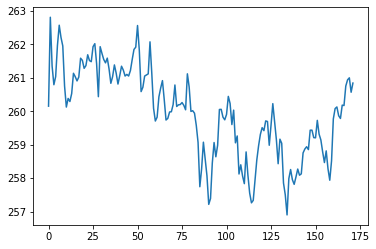

sub-10_ses-test_task-fingerfootlips_bold.nii.gz


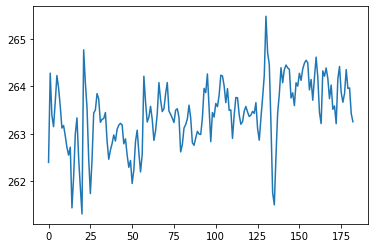

sub-10_ses-test_task-linebisection_bold.nii.gz


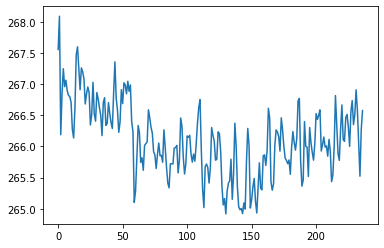

sub-10_ses-test_task-overtverbgeneration_bold.nii.gz


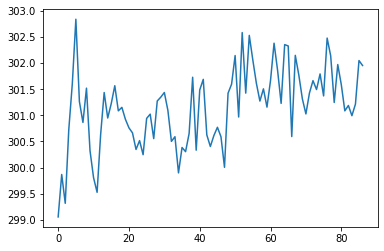

sub-10_ses-test_task-overtwordrepetition_bold.nii.gz


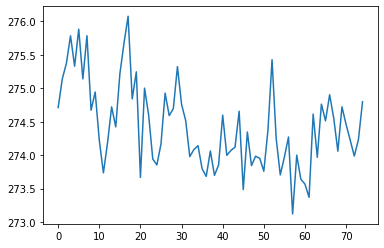

In [118]:
for bold_nifti in sorted(bidspath.rglob('*bold.nii.gz')):
    print(bold_nifti.name)
    img = nib.load(str(bold_nifti))
    plt.plot(np.mean(img.dataobj, axis = (0,1,2))[1:])
    plt.show()

What does this tell us? Even before doing any motion correction, I suspect that I have a large degree of task-correlated head motion, particularly for the verb generation tasks (check out subject 08!). Let's see if that holds up as we get into real data analysis next week!

One last thing. You may have noticed there's a module in my shared directory called niftiviewer. It's VERY much in development, so I didn't use it here, but if you want to try it, it works like this:

In [119]:
import niftiviewer

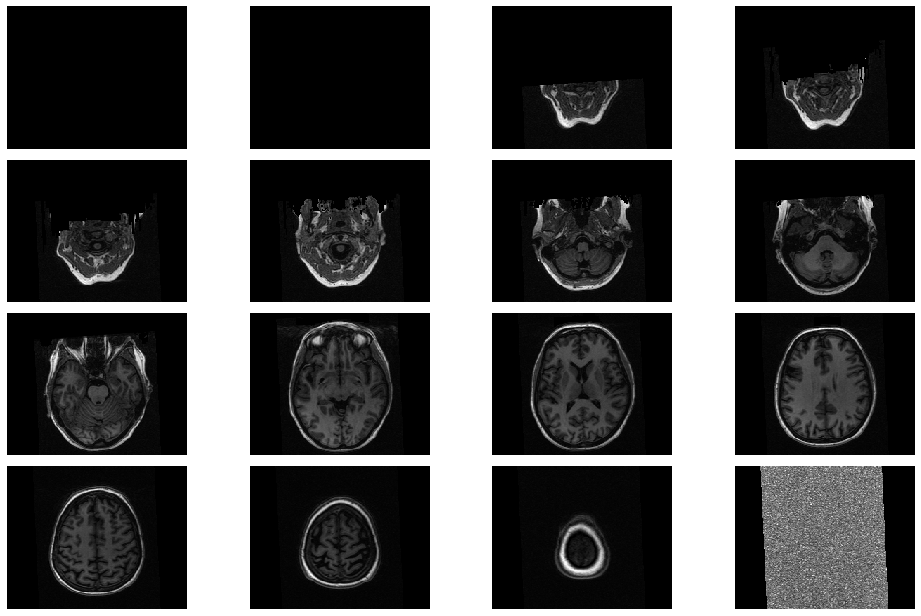

In [120]:
niftiviewer.QuickView(example_anat, [4,4])